In [1]:
!pip install -U bitsandbytes transformers accelerate lime captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 43.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cf976f9a2ba19a3266406effa50eda149a9da80d7bc253468c03f5e5492c1632
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

In [2]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import sys

path = os.getcwd()
while True:
    if 'utils.py' in os.listdir(path):
        if path not in sys.path:
            sys.path.append(path)
        break
    new_path = os.path.dirname(path)
    if new_path == path:
        print("utils.py not found in any parent folder. Please upload.")
        upload_utils = files.upload()
        break
    path = new_path

import utils
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch

utils.py not found in any parent folder. Please upload.


Saving utils.py to utils.py


In [4]:
# Global Parameters of Notebook
global_params = {'dataset_type': 'scitail',
                'quantization': '8bit',
                'training_mode': 'zero shot',
                'model_id': 'meta-llama/Llama-3.1-8B-Instruct'}

# Create checkpoint path
checkpoint_path = utils.create_checkpoint_path(params=global_params)

Saving to: /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.1_8B_Instruct_8bit_zero_shot.pt


In [5]:
utils.hf_login("HF_TOKEN")

In [7]:
# Quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_8bit=True
)

tokenizer = AutoTokenizer.from_pretrained(global_params['model_id'])
model = AutoModelForCausalLM.from_pretrained(
    global_params['model_id'],
    device_map="auto",
    quantization_config=quantization_config,
    attn_implementation="eager"
    )

# Add padding token to the tokenizer
tokenizer.pad_token = tokenizer.eos_token

# Change the model to evaluation mode
model.eval()

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear8bitLt(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear8bitLt(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear8bitLt(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear8bitLt(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear8bitLt(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      )
    )
    (

In [8]:
files.upload()
scitail_test = pd.read_csv('scitail_test.csv')

Saving scitail_test.csv to scitail_test.csv


In [9]:
scitail_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   premise                     2126 non-null   object
 1   hypothesis                  2126 non-null   object
 2   label                       2126 non-null   object
 3   hypothesis_graph_structure  2126 non-null   object
dtypes: object(4)
memory usage: 66.6+ KB


In [10]:
scitail_test.head(10)

,premise,hypothesis,label,hypothesis_graph_structure
0,Based on the list provided of the uses of subs...,"If a substance has a ph value greater than 7,t...",neutral,a substance<>has<>a ph value greater than 7
1,If one or two base pairs are change...,Invertebrates (and higher animals) can also be...,neutral,Invertebrates (and higher animals<>can be plac...
2,"At high temperatures, the solid dye converts i...",Gases and liquids become solids at low tempera...,neutral,Gases and liquids<>become<>solids
3,Chapter 11 Gas and Kinetic Theory .,The behavior of ideal gases is explained by ki...,neutral,The behavior of ideal gases<>is explained<>by ...
4,Both the continental crust and the oceanic cru...,Gabbro is a dark dense rock that can be found ...,neutral,Gabbro<>is<>a dark dense rock that can be foun...
5,The phylum for common marigolds is angiosperms.,Angiosperms are the most successful phylum of ...,neutral,Angiosperms<>are<>the most successful phylum o...
6,Lyme Disease is caused by a bacterium that's ...,Lyme disease is caused by bacteria.,entails,Lyme disease<>is caused<>by bacteria
7,Corolla Collective term for all the petals of ...,All of the petals together are called a corolla.,entails,All of the petals<>together are called<>a corolla
8,A polyploid is simply an organism that contain...,A(n) polyploid is an individual with more than...,entails,A(n) polyploid<>is<>an individual with more th...
9,Because type 1 diabetes is a relatively rare d...,Diabetes is unpreventable in the type one form...,neutral,Diabetes<>is<>unpreventable$$$it<>is<>of the s...


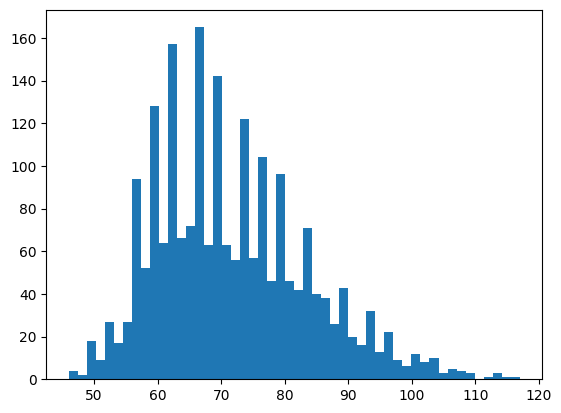

Max prompt length: 117
Max label length: 2


In [11]:
# Find the max_length for tokenization to avoid wasting computing.
utils.find_max_length(scitail_test, tokenizer=tokenizer, dataset_type=global_params['dataset_type'])

In [12]:
prompt_lengths, _ = utils.get_lengths(scitail_test, tokenizer, global_params['dataset_type'])
df = pd.DataFrame(prompt_lengths, columns=["length"])
n = (df["length"] > 117).sum()
percent = round(n/len(df)*100, 3)
print("Number of examples that have over 117 tokens and will be truncated:", n, "out of", len(df), "examples or", percent, "%")

Number of examples that have over 117 tokens and will be truncated: 0 out of 2126 examples or 0.0 %


In [13]:
# Define dataset and create a dataloader.
dataset_test = utils.MyDataset(dataframe=scitail_test,
                               tokenizer=tokenizer,
                               dataset_type=global_params['dataset_type'],
                               prompt_max_length=117,
                               label_max_length=3)

batch_size = 16 # Change batch size according to GPU
dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [14]:
# Test
predictions, gold_labels, batch_probs = utils.test_run(model=model,
                                          dataloader=dataloader,
                                          tokenizer=tokenizer,
                                          dataset_type=global_params['dataset_type'])

for i, pair in enumerate(zip(predictions, gold_labels)):
    print(pair, batch_probs[i])

('entails', 'neutral') tensor([0.8886, 0.1114], device='cuda:0')
('entails', 'neutral') tensor([0.9347, 0.0653], device='cuda:0')
('neutral', 'neutral') tensor([0.2879, 0.7121], device='cuda:0')
('neutral', 'neutral') tensor([0.2151, 0.7849], device='cuda:0')
('neutral', 'neutral') tensor([0.4438, 0.5562], device='cuda:0')
('neutral', 'neutral') tensor([0.1858, 0.8142], device='cuda:0')
('entails', 'entails') tensor([0.5672, 0.4328], device='cuda:0')
('neutral', 'entails') tensor([0.2347, 0.7653], device='cuda:0')
('entails', 'entails') tensor([0.7667, 0.2333], device='cuda:0')
('entails', 'neutral') tensor([0.6863, 0.3137], device='cuda:0')
('neutral', 'neutral') tensor([0.2111, 0.7889], device='cuda:0')
('neutral', 'neutral') tensor([0.3566, 0.6434], device='cuda:0')
('entails', 'entails') tensor([0.5606, 0.4394], device='cuda:0')
('entails', 'neutral') tensor([0.8531, 0.1469], device='cuda:0')
('entails', 'neutral') tensor([0.7796, 0.2204], device='cuda:0')
('neutral', 'neutral') te

In [15]:
from tqdm import tqdm

# Load checkpoint if it exists
predicted_labels, gold_labels, start_batch = utils.load_checkpoint(checkpoint_path=checkpoint_path)
labels = utils.get_labels('scitail')

# Loop over the batches
with torch.no_grad():
    for i, batch in enumerate(tqdm(dataloader, desc="Evaluating", unit="batch")):

        # Continue from last checkpoint
        if i < start_batch:
            continue

        input_ids_batch = batch["input_ids"].to(model.device) # Move to GPU
        attention_mask_batch = batch["attention_mask"].to(model.device) # Move to GPU
        gold_labels_batch = batch["labels"] # Keep to CPU

        batch_probs = utils.get_model_probs(batch_input_ids=input_ids_batch,
                                      batch_attention_mask=attention_mask_batch,
                                      dataset_type='scitail',
                                      model=model,
                                      tokenizer=tokenizer)

        # Try to catch NaN values
        if torch.isnan(batch_probs).any():
            print("Warning: NaNs detected in batch_probs")

        batch_pred_indices = torch.argmax(batch_probs, dim=1)
        batch_pred_labels = [labels[i] for i in batch_pred_indices]

        predicted_labels.extend(batch_pred_labels)
        gold_labels.extend(gold_labels_batch)

        # Save checkpoint
        if i % 50 == 0 or i == len(dataloader) - 1:
            torch.save({"predicted_labels": predicted_labels,
                        "gold_labels": gold_labels,
                        "batch_no": i+1}, checkpoint_path)

            print(f"Checkpoint saved: {i+1}, {checkpoint_path}")

No checkpoint found.


Evaluating:   1%|          | 1/133 [00:11<25:45, 11.71s/batch]

Checkpoint saved: 1, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.1_8B_Instruct_8bit_zero_shot.pt


Evaluating:  38%|███▊      | 51/133 [09:47<15:20, 11.22s/batch]

Checkpoint saved: 51, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.1_8B_Instruct_8bit_zero_shot.pt


Evaluating:  76%|███████▌  | 101/133 [19:08<05:58, 11.21s/batch]

Checkpoint saved: 101, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.1_8B_Instruct_8bit_zero_shot.pt


Evaluating: 100%|██████████| 133/133 [25:02<00:00, 11.30s/batch]

Checkpoint saved: 133, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.1_8B_Instruct_8bit_zero_shot.pt


Checkpoint found.
Accuracy: 0.5621.
 F1 Score: 0.5569.
 Matthew's Correlation Coefficient: 0.1254.
 Cohen's Kappa Score: 0.1228.


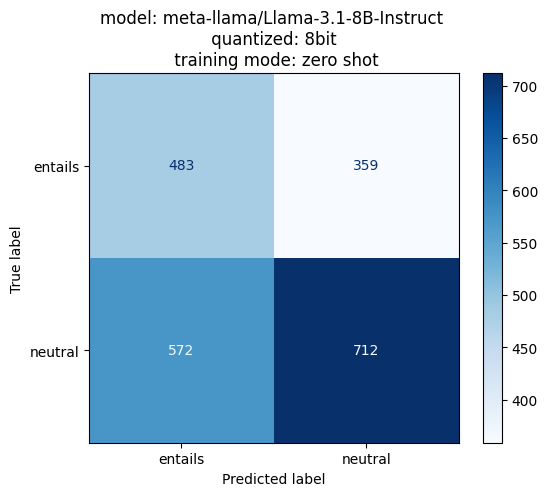

In [16]:
# Calculate metrics
predicted_labels, gold_labels, _ = utils.load_checkpoint(checkpoint_path)
utils.evaluate_metrics(predicted_labels=predicted_labels, gold_labels=gold_labels, params=global_params)

Checkpoint found.
Accuracy: 0.5776.
 F1 Score: 0.5671.
 Matthew's Correlation Coefficient: 0.1372.
 Cohen's Kappa Score: 0.1365.


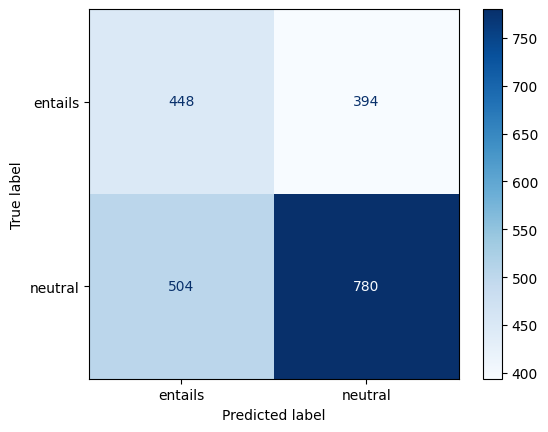

In [ ]:
# Calculate metrics
predicted_labels, gold_labels, _ = utils.load_checkpoint('/content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.1_8B_Instruct.pt')
utils.evaluate_metrics(predicted_labels=predicted_labels, gold_labels=gold_labels, dataset_type='scitail')